In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

In [12]:
df = pd.read_excel('/Users/pranavkalyanpur/Downloads/data.xlsx') 

In [13]:
df.drop(['Submission Date','Fake Name','Study ID Number'], axis=1, inplace = True)
df.head(5)

,Did you graduate from high school?,When did you earn your high-school diploma?,What grades did you usually make in high school English?,When did you earn your GED/HiSET?,Which best describes your experience earning your GED/HiSET?,Which best describes your experience with textbooks?,How many multi-page resaech papers with citations have you written?,Which best describes your experience with using computers to write papers?,Which best describes your experience with writing in the workplace?,Which best describes your formal writing skills?,...,How important is the ability to read and write well?,How often do you reflect upon your personal strengths and weaknesses?,Which best describes your mindset related to academics?,Which best describes your work ethic related to academics?,Which best describes how you study?,How often do you participate in class?,How are your time-management skills?,How are your organization skills?,Senario: What would you do?,Assigned To
0,NO,NaN,NaN,More than 10 years ago,"It was mostly easy, but some of it was challen...",NaN,"None, or I am not sure what a citation is.",I have had very little experience using comput...,NaN,My formal writing skills are not very good.,...,Very important—the ability to read and write w...,NaN,"I embrace challenges, want honest feedback fro...",I work hard on the tasks/assignments given to ...,I usually take notes. I usually complete homew...,I sometimes participate in class.,"Sometimes I procrastinate, but I usually do no...",I am fairly well organized in some aspects of ...,I would be in class on time without my assignm...,ALIT 099
1,YES,1-5 years ago,B’s,NaN,NaN,I almost always understand what I read in text...,4 or more,I have had a lot of experience using computers...,I have occasionally had to do some formal writ...,My formal writing skills are pretty good.,...,Very important—the ability to read and write w...,Daily,"I embrace challenges, want honest feedback fro...",I work hard on the tasks/assignments given to ...,I always take notes. I complete all of my home...,I often participate in class.,"Sometimes I procrastinate, but I usually do no...",I am very well organized in most aspects of my...,I would be in class on time without my assignm...,ENGL 110
2,NO,NaN,NaN,NaN,NaN,I almost always understand what I read in text...,1,I have had a lot of experience using computers...,I have rarely had to do any formal writing in ...,My formal writing skills are pretty good.,...,Very important—the ability to read and write w...,Daily,I like challenges and honest feedback from ins...,I work hard on the tasks/assignments given to ...,I always take notes. I complete all of my home...,I often participate in class.,"Sometimes I procrastinate, but I usually do no...",I am very well organized in most aspects of my...,I would be in class on time without my assignm...,ENGL 101
3,YES,More than 10 years ago,A’s,NaN,NaN,I usually understand what I read in textbooks.,1,I have had some experience using computers to ...,I have rarely had to do any formal writing in ...,My formal writing skills are okay.,...,Very important—the ability to read and write w...,Rarely,I am okay with some challenges and honest feed...,I usually work hard on most tasks/assignments ...,I usually take notes. I usually complete homew...,I often participate in class.,"Sometimes I procrastinate, but I usually do no...",I am fairly well organized in some aspects of ...,I would be in class on time without my assignm...,ENGL 101
4,NO,NaN,NaN,NaN,NaN,I usually understand what I read in textbooks.,2-3,I have had a lot of experience using computers...,I have rarely had to do any formal writing in ...,My formal writing skills are okay.,...,Very important—the ability to read and write w...,Every now and then,I am okay with some challenges and honest feed...,I usually work hard on most tasks/assignments ...,I usually take notes. I usually complete homew...,I often participate in class.,"Sometimes I procrastinate, but I usually do no

In [14]:
df['Assigned To'].value_counts()

ALIT 099    513
ENGL 101    431
ENGL 110     48
Name: Assigned To, dtype: int64

In [15]:
df.drop(['When did you earn your GED/HiSET?', 'Which best describes your experience earning your GED/HiSET?'], axis=1, inplace=True)

df.isnull().sum()

Did you graduate from high school?                                                              0
When did you earn your high-school diploma?                                                    85
What grades did you usually make in high school English?                                       81
Which best describes your experience with textbooks?                                            3
How many multi-page resaech papers with citations have you written?                             3
Which best describes your experience with using computers to write papers?                      3
Which best describes your experience with writing in the workplace?                             4
Which best describes your formal writing skills?                                                2
How often do you read books, magazine/newspaper articles, or essays?                            2
How comfortable are you with grammar, spelling, and/or punctuation?                             2
Reading Sample: Whic

In [16]:
cols = df.columns
cols = cols[:-1]
cols

Index(['Did you graduate from high school?',
       'When did you earn your high-school diploma?',
       'What grades did you usually make in high school English?',
       'Which best describes your experience with textbooks?',
       'How many multi-page resaech papers with citations have you written?',
       'Which best describes your experience with using computers to write papers?',
       'Which best describes your experience with writing in the workplace?',
       'Which best describes your formal writing skills?',
       'How often do you read books, magazine/newspaper articles, or essays?',
       'How comfortable are you with grammar, spelling, and/or punctuation?',
       'Reading Sample: Which best describes your understanding of the passage?',
       'How much time will you have to commit to your English course in addition to class meetings?',
       'How important is the ability to read and write well?',
       'How often do you reflect upon your personal strengths and w

In [17]:
from sklearn.impute import SimpleImputer

impute_size=SimpleImputer(strategy="most_frequent") 
for col in cols:
    df[col] = impute_size.fit_transform(df[[col]])

In [18]:
for col in cols:
    df[col] = df[col].astype('category').cat.codes

In [19]:
df['Assigned To'] = df['Assigned To'].astype('category').cat.codes

In [20]:
df.head(10)

,Did you graduate from high school?,When did you earn your high-school diploma?,What grades did you usually make in high school English?,Which best describes your experience with textbooks?,How many multi-page resaech papers with citations have you written?,Which best describes your experience with using computers to write papers?,Which best describes your experience with writing in the workplace?,Which best describes your formal writing skills?,"How often do you read books, magazine/newspaper articles, or essays?","How comfortable are you with grammar, spelling, and/or punctuation?",...,How important is the ability to read and write well?,How often do you reflect upon your personal strengths and weaknesses?,Which best describes your mindset related to academics?,Which best describes your work ethic related to academics?,Which best describes how you study?,How often do you participate in class?,How are your time-management skills?,How are your organization skills?,Senario: What would you do?,Assigned To
0,0,2,1,3,3,2,1,1,3,2,...,3,0,2,3,3,3,3,0,0,0
1,1,0,1,0,2,0,2,3,1,0,...,3,0,2,3,0,1,3,2,0,2
2,0,2,1,0,0,0,3,3,1,3,...,3,0,3,3,0,1,3,2,0,1
3,1,3,0,3,0,1,3,2,1,0,...,3,3,0,2,3,1,3,0,0,1
4,0,2,1,3,1,0,3,2,3,0,...,3,1,0,2,3,1,3,0,3,2
5,1,3,2,0,3,0,1,3,1,3,...,3,1,3,2,2,3,3,1,0,1
6,1,1,0,3,2,0,2,3,1,0,...,3,0,3,3,0,1,1,2,0,1
7,1,3,2,3,3,2,3,2,3,0,...,3,0,2,3,0,1,3,2,0,1
8,1,0,0,2,1,0,1,3,2,0,...,3,3,0,1,2,2,0,1,3,0
9,1,0,1,0,1,0,2,0,1,3,...,3,0,2,2,0,1,1,2,0,0


In [21]:
df.dtypes

Did you graduate from high school?                                                             int8
When did you earn your high-school diploma?                                                    int8
What grades did you usually make in high school English?                                       int8
Which best describes your experience with textbooks?                                           int8
How many multi-page resaech papers with citations have you written?                            int8
Which best describes your experience with using computers to write papers?                     int8
Which best describes your experience with writing in the workplace?                            int8
Which best describes your formal writing skills?                                               int8
How often do you read books, magazine/newspaper articles, or essays?                           int8
How comfortable are you with grammar, spelling, and/or punctuation?                            int8


# Prediction using Logistic Regression (Multinomial Logistic Regression)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = df['Assigned To']
X = df.drop(['Assigned To'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 20,test_size = 0.2)

In [44]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(multi_class='multinomial')
lreg.fit(X_train, y_train)

print("Train score: {:.4f}".format(lreg.score(X_train, y_train)))
print("Test score: {:.4f}".format(lreg.score(X_test, y_test)))

Train score: 0.5864
Test score: 0.4925


/Users/pranavkalyanpur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix for Logistic Classifier

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = lreg.predict(X_test)
print(classification_report(y_pred, y_test))

print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56       123
           1       0.41      0.49      0.44        76
           2       0.00      0.00      0.00         0

    accuracy                           0.49       199
   macro avg       0.35      0.33      0.34       199
weighted avg       0.56      0.49      0.52       199

[[61 54  8]
 [33 37  6]
 [ 0  0  0]]


/Users/pranavkalyanpur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Nearest Neighbor (KNN)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier()

param_grid = [{'weights': ['uniform', 'distance'],
                             'n_neighbors': range(1,11)
                             }
                            ]
knn_grid = GridSearchCV(knr, param_grid, cv=5)

# fit the grid with data
knn_grid.fit(X_train, y_train)

knn_grid.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [49]:
knr = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')  
knr.fit(X_train, y_train)

print("Train score: {:.4f}".format(knr.score(X_train, y_train)))
print("Test score: {:.4f}".format(knr.score(X_test, y_test)))

Train score: 0.7377
Test score: 0.5075


In [50]:
y_pred = knr.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.50      0.63       155
           1       0.25      0.52      0.34        44
           2       0.00      0.00      0.00         0

    accuracy                           0.51       199
   macro avg       0.36      0.34      0.32       199
weighted avg       0.70      0.51      0.56       199

[[78 68  9]
 [16 23  5]
 [ 0  0  0]]


/Users/pranavkalyanpur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"n_estimators": [10,50,100],
              "max_features":['auto', 'sqrt', 'log2'],
              "max_depth": range(3,8),
              "bootstrap": [True, False]
             }

rnd_reg = RandomForestClassifier(random_state = 0)

rnd_reg = GridSearchCV(rnd_reg, param_grid, n_jobs = 6, cv = 5)
rnd_reg.fit(X_train, y_train)

#use gridsearch to get the best parameters
print('Best parameters{}'.format(rnd_reg.best_params_))
print('Best score {:.4f}'.format(rnd_reg.best_score_))

Best parameters{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}
Best score 0.5978


In [52]:
rnd_reg = RandomForestClassifier(n_estimators=10, max_depth=4, max_features='auto', bootstrap=True, random_state=0)
rnd_reg.fit(X_train, y_train)

print("Train score: {:.4f}".format(rnd_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(rnd_reg.score(X_test, y_test)))

Train score: 0.6482
Test score: 0.4724


In [53]:
y_pred = rnd_reg.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56       140
           1       0.31      0.47      0.37        59
           2       0.00      0.00      0.00         0

    accuracy                           0.47       199
   macro avg       0.34      0.32      0.31       199
weighted avg       0.59      0.47      0.51       199

[[66 63 11]
 [28 28  3]
 [ 0  0  0]]


/Users/pranavkalyanpur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Importance

No handles with labels found to put in legend.


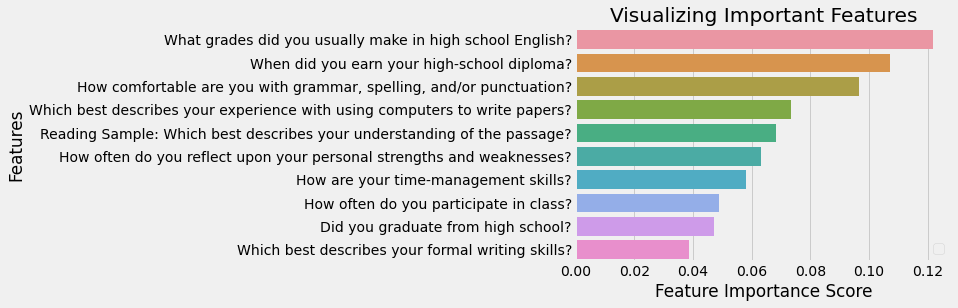

In [73]:
feature_imp = pd.Series(rnd_reg.feature_importances_, index = df.columns[:-1]).sort_values(ascending=False)
#print(feature_imp)

sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()